In [3]:
import pandas as pd
import os
import school_analysis as sa

path=os.path.join(sa.PROJECT_PATH, "data_", "genesis","students_with_sepecial_educational_support.csv")
df = pd.read_csv(os.path.join(sa.PROJECT_PATH ,path), sep=";", skiprows=5, skipfooter=4, engine="python")
df.replace("b'", "", inplace=True, regex=True)


df.replace("b'", "", inplace=True, regex=True)
years = [int(item.split("/")[0]) for item in df.iloc[1].dropna().tolist() if item!='' and item!='\'']
df = df.fillna(method='ffill')

df.rename(columns={df.columns[0]: 'school'}, inplace=True)
df.rename(columns={df.columns[1]: 'effects'}, inplace=True)
df
data = []
for index, row in df.iloc[4:,].iterrows():
    for idx, year in enumerate(years):      
        record = {
            'school': row[0],
            'effect': row[1],
            'year': year,
            'male': row[2+idx*6],
            'female': row[4+idx*6],
            'total': row[6+idx*6],
        }
        data.append(record)
melted_df = pd.DataFrame(data)
melted_df


#df

C:\Users\jonas\AppData\Local\Temp\ipykernel_33672\315815880.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
C:\Users\jonas\AppData\Local\Temp\ipykernel_33672\315815880.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'school': row[0],
C:\Users\jonas\AppData\Local\Temp\ipykernel_33672\315815880.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'effect': row[1],
C:\Users\jonas\AppData\Local\Temp\ipykernel_33672\315815880.py:24: FutureWarning: Series.__getitem__ treating keys as position

,school,effect,year,male,female,total
0,Primary schools,Learning,2014,17714,13336,31050
1,Primary schools,Learning,2015,18661,13156,31817
2,Primary schools,Learning,2016,17798,13717,31515
3,Primary schools,Learning,2017,18037,14125,32162
4,Primary schools,Learning,2018,21807,17232,39039
...,...,...,...,...,...,...
1066,Total,Not assigned to a main area of support,2018,9384,3996,13380
1067,Total,Not assigned to a main area of support,2019,9369,4059,13431
1068,Total,Not assigned to a main area of support,2020,2475,612,3087
1069,Total,Not assigned to a main area of support,2021,2562,500,3062


findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

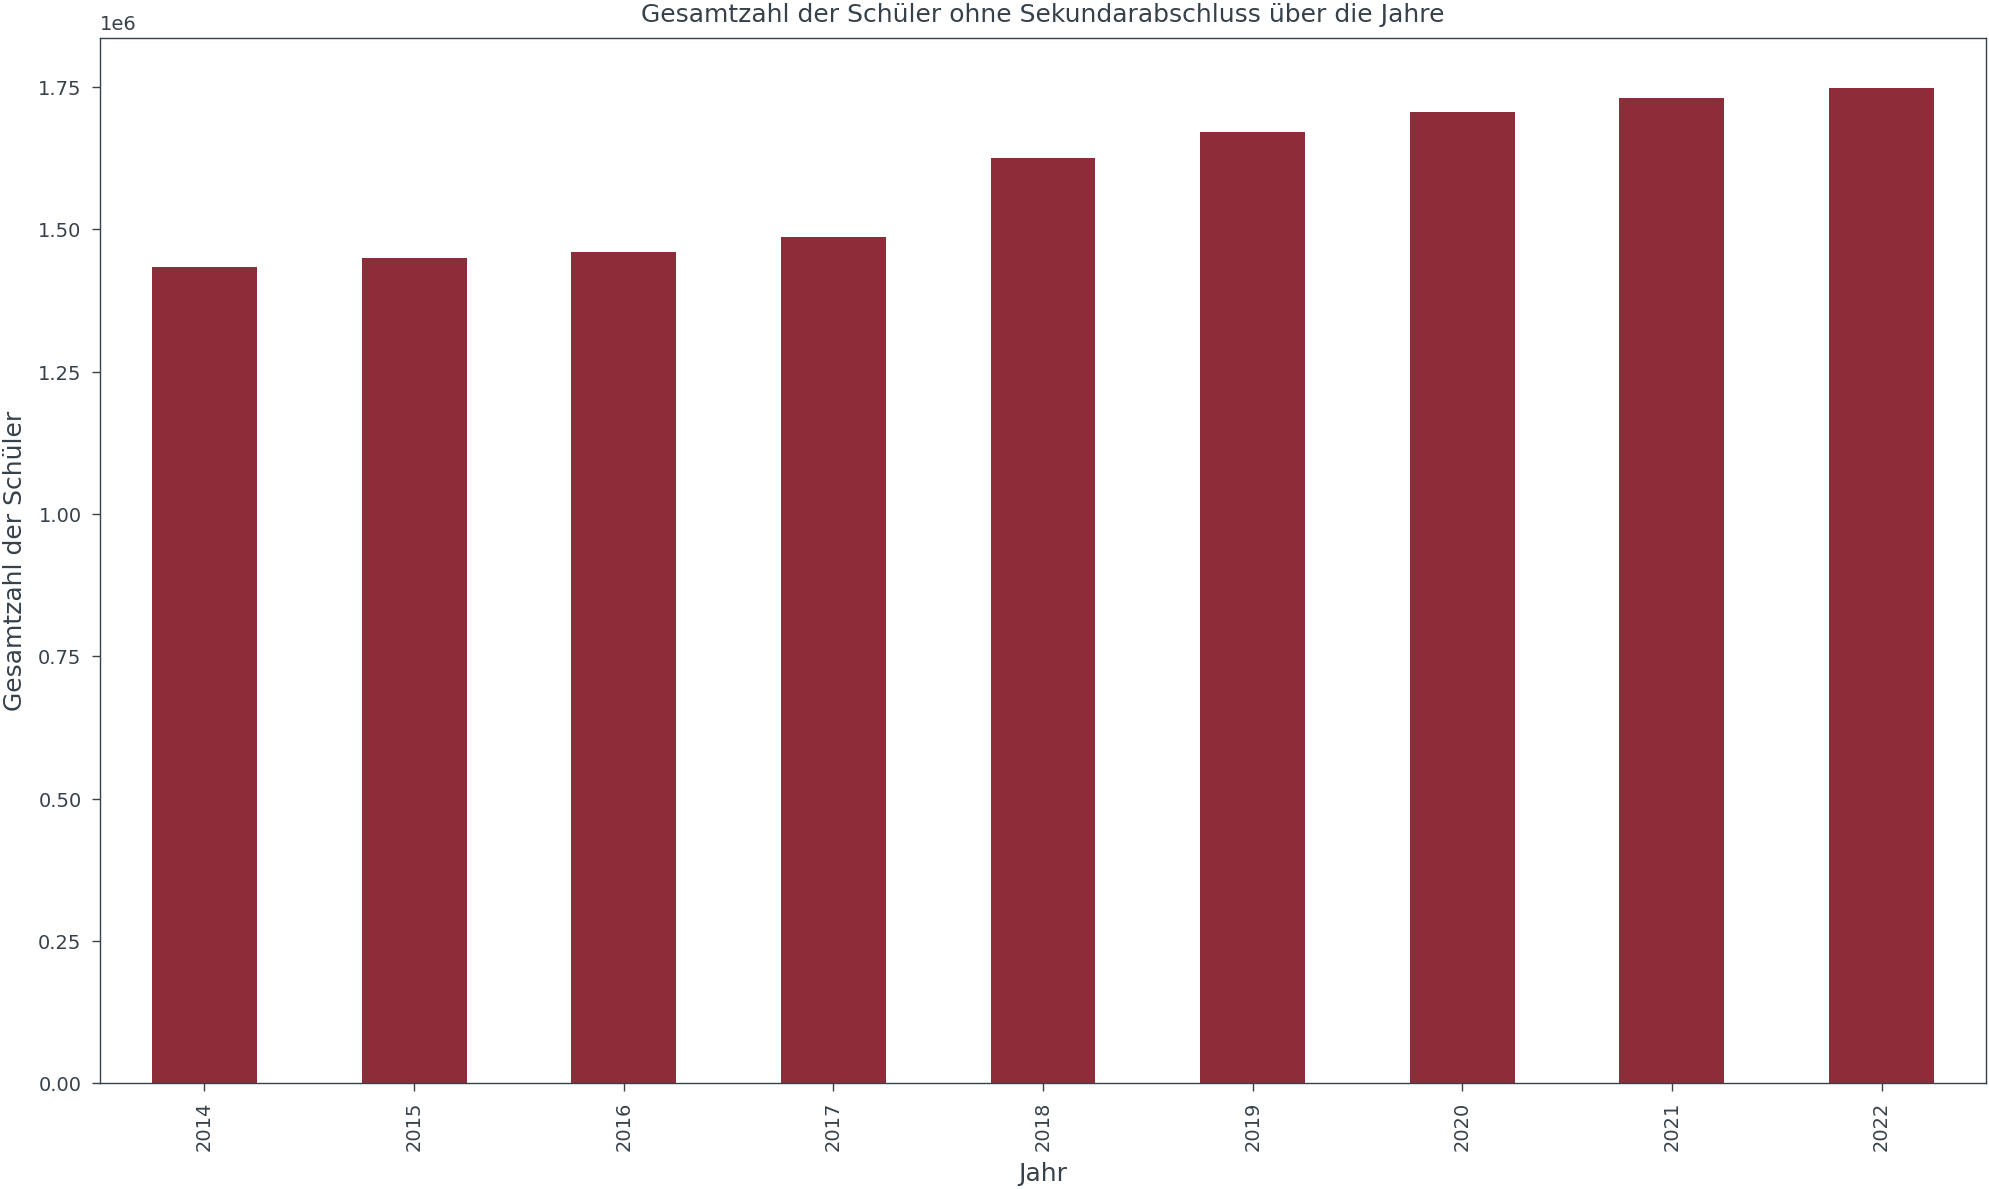

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

melted_df['total'] = pd.to_numeric(melted_df['total'], errors='coerce')
# Gruppieren der Daten nach Jahr und Summieren der Gesamtzahl der Schüler
students_with_special_needs = melted_df.groupby('year')['total'].sum()
# Plotten der Daten
plt.figure(figsize=(10, 6))
students_with_special_needs.plot(kind='bar')
plt.title('stundets with special needs')
plt.xlabel('year')
plt.ylabel('students')
plt.show()